<a href="https://colab.research.google.com/github/styxx216/zoomcamp_mlops/blob/main/zoomcamp_mlops_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [801]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-09 16:14:22--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.28’

data.csv.28         100%[===================>]   1.41M  6.15MB/s    in 0.2s    

2023-10-09 16:14:23 (6.15 MB/s) - ‘data.csv.28’ saved [1475504/1475504]



In [802]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold


In [803]:
%matplotlib inline

In [804]:
df = pd.read_csv('data.csv')

In [805]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [806]:
columns = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']

Data preparation


In [807]:
df = df[columns]

In [808]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [809]:
df = df.fillna(0)

In [810]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [811]:
df['above_average'] = df['msrp']>((df['msrp']).mean())

In [812]:
df_full_train, df_test= train_test_split(df, test_size=0.20, random_state=1)
df_train, df_val= train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


1

In [813]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)[:-2]
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)


In [814]:
for value in numerical_columns:
    print(str(round(max(roc_auc_score(df['above_average'].values, - df[value].values),roc_auc_score(df['above_average'].values,df[value].values)),2))+'  -  '+str(value))

0.69  -  year
0.92  -  engine_hp
0.77  -  engine_cylinders
0.63  -  highway_mpg
0.67  -  city_mpg


2

In [815]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
y_train = df_train['above_average'].values

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_val= df_val['above_average'].values

In [816]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [817]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [818]:
y_pred = model.predict_proba(X_val)[:, 1]

In [819]:
fpr, tpr, thresholds = roc_curve(y_val,y_pred)
print(round(auc(fpr, tpr),4))

0.9797


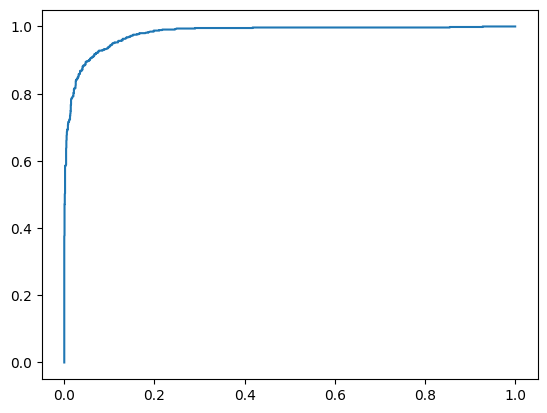

In [820]:
plt.plot(fpr, tpr)

In [821]:
score = (roc_auc_score(y_val,y_pred))

In [822]:

print(f'{score :.4f}')

0.9797


3

In [823]:
thresholds  = np.linspace(0, 1, 101)

In [824]:
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [825]:
precision  = np.zeros(len(thresholds))
recall  = np.zeros(len(thresholds))

In [826]:
for i in range(len(thresholds)):
    precision[i] = precision_score (y_val, y_pred >= thresholds[i])
    recall[i] = recall_score(y_val, y_pred >= thresholds[i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


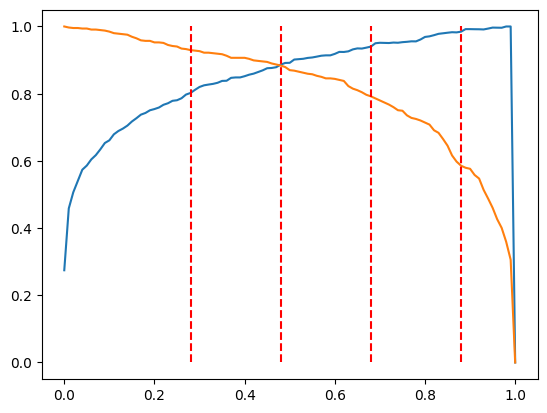

In [827]:

plt.plot(thresholds,precision)
plt.plot(thresholds,recall)
plt.plot([0.28,0.28],[0,1],'--r')
plt.plot([0.48,0.48],[0,1],'--r')
plt.plot([0.68,0.68],[0,1],'--r')
plt.plot([0.88,0.88],[0,1],'--r')

4

In [828]:
f1  = np.zeros(len(thresholds))

In [829]:
for i in range(len(thresholds)):
    f1[i] = f1_score(y_val,y_pred >= thresholds[i])

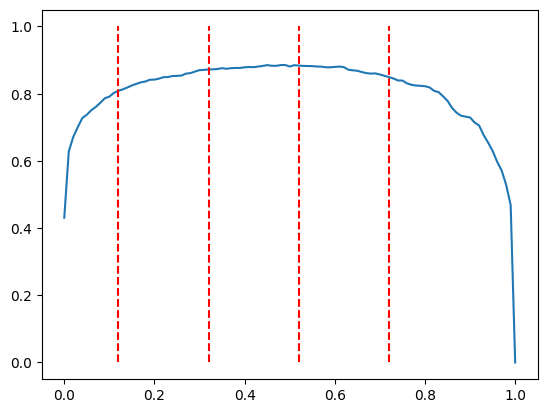

In [830]:
plt.plot(thresholds,f1)
plt.plot([0.12,0.12],[0,1],'--r')
plt.plot([0.32,0.32],[0,1],'--r')
plt.plot([0.52,0.52],[0,1],'--r')
plt.plot([0.72,0.72],[0,1],'--r')

In [831]:
thresholds[np.argmax(f1)]

0.49

In [832]:
print(round(f1_score(y_val,y_pred >= 0.12),4))
print(round(f1_score(y_val,y_pred >= 0.32),4))
print(round(f1_score(y_val,y_pred >= 0.52),4))
print(round(f1_score(y_val,y_pred >= 0.72),4))

0.8086
0.872
0.8837
0.8494


5

In [833]:
def train(df_train,C = 1):
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    y_train = df_train['above_average'].values
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train,y_train)

    return dv, model

In [834]:
def predict(dv,df_val, model):
    val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_val = df_val['above_average'].values
    y_pred = model.predict_proba(X_val)[:, 1]

    return y_val, y_pred

In [835]:
scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        dv, model = train(df_train)
        y_val,y_pred = predict(dv,df_val, model)
        scores.append(roc_auc_score(y_val,y_pred))

In [836]:
np.std(scores)

0.002060199182252492

In [837]:
scores

[0.9784891235596622,
 0.9802029731275015,
 0.9829025151971447,
 0.9772586581897273,
 0.9776862026862028]

6

In [838]:
for C in [0.01, 0.1, 0.5, 10]:
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        dv, model = train(df_train,C)
        y_val,y_pred = predict(dv,df_val, model)
        scores.append(roc_auc_score(y_val,y_pred))
    print(f'C =  {C}, mean = {round(np.mean(scores),4)},std = {round(np.std(scores),4)}')

C =  0.01, mean = 0.9516,std = 0.0025
C =  0.1, mean = 0.9718,std = 0.0016
C =  0.5, mean = 0.9769,std = 0.0016
C =  10, mean = 0.9813,std = 0.0033
